In [26]:
# Random Forest 


In [27]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
import sys
sys.path.append('../')

In [29]:
from src.visualization.model_evaluation import plot_confusion_matrix, plot_roc_curve

In [30]:
# importing the dataset 

data = pd.read_csv('..\\data\\processed\\nba_train_processed.csv')

In [31]:
# Splitting the dataset into X and y

X = data.drop(['TARGET_5Yrs'], axis = 1)
y = data['TARGET_5Yrs']

# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)


In [32]:
# creating the model

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# fitting the model

model.fit(X_train, y_train)

# predicting the model

y_pred = model.predict(X_test)

# checking the accuracy
accuracy_score(y_test, y_pred)


0.8348754448398576

RandomForestClassifier(random_state=42)


In [33]:
# Initial Accuracy of the experiment is not too bad, to begin with. 0.83.

Text(0.5, 1.0, 'Confusion Matrix for Train Data')

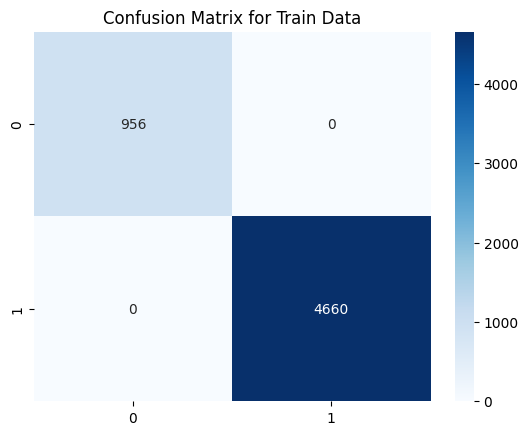

In [34]:
plot_confusion_matrix(y_train, model.predict(X_train), title="Confusion Matrix for Train Data")

Text(0.5, 1.0, 'Confusion Matrix for Test Data')

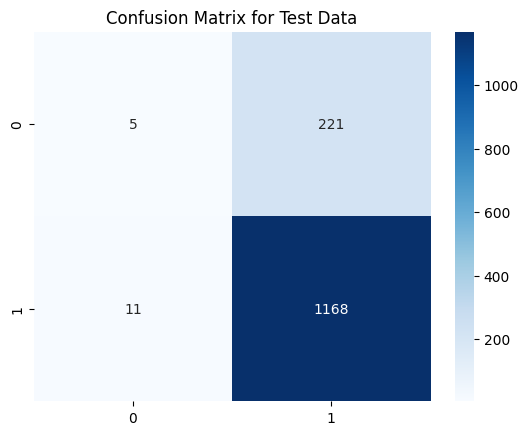

In [35]:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for Test Data")

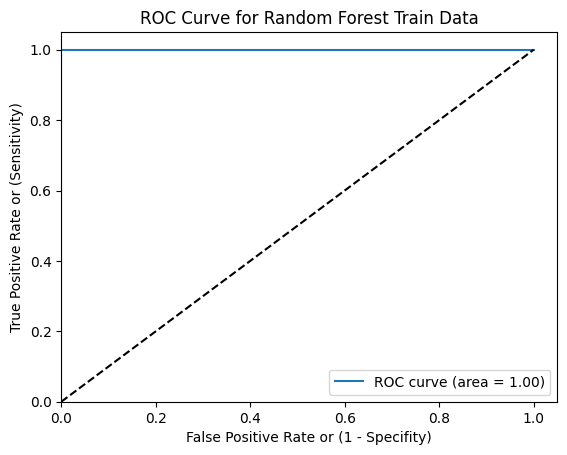

In [36]:
plot_roc_curve(y_train, model.predict_proba(X_train)[:,1], "Random Forest Train Data")

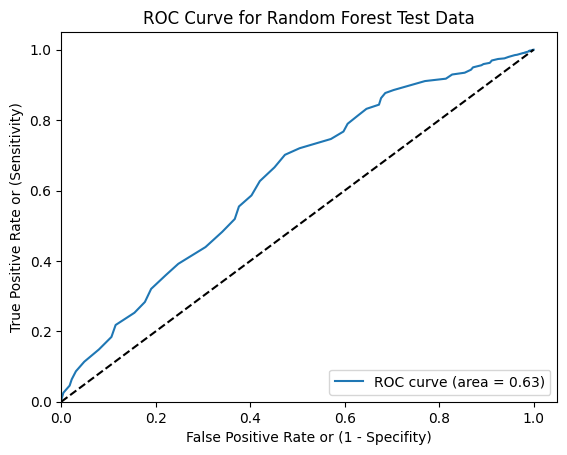

In [37]:
plot_roc_curve(y_test, model.predict_proba(X_test)[:,1], "Random Forest Test Data")

In [38]:
# The ROC curve is not impressive at all. The AUC score is 0.63

In [40]:
# Run Time was 5m 21s on my machine.

In [85]:
# Optimising the hyperparameters using GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                'max_depth': [ 7, 8, 9, 10,11,12,13,14],
                }


# Record the time 
import time
start = time.time()

model = RandomForestClassifier(random_state = 42)


grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1, scoring = 'roc_auc')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

end_time = time.time()
print("Time taken by above cell is {}.".format(end_time - start))




Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'max_depth': 7, 'n_estimators': 500}
Time taken by above cell is 34.722254037857056.


Text(0.5, 1.0, 'Confusion Matrix for Train Data')

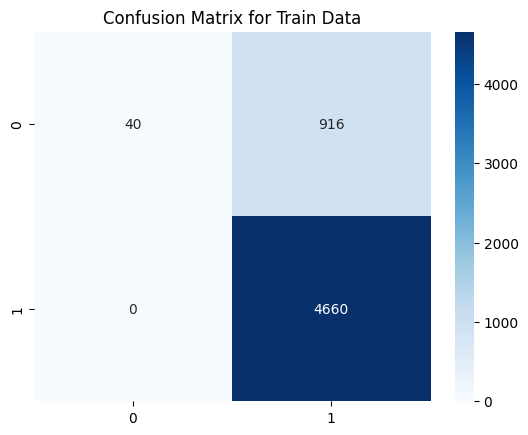

In [86]:
# Plot confusion matrix for train data

plot_confusion_matrix(y_train, grid_search.predict(X_train), title="Confusion Matrix for Train Data")

Text(0.5, 1.0, 'Confusion Matrix for Test Data')

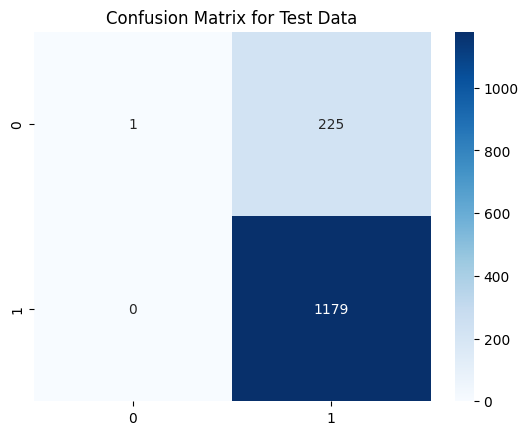

In [87]:
# plot confusion matrix for test data

plot_confusion_matrix(y_test, grid_search.predict(X_test), title="Confusion Matrix for Test Data")

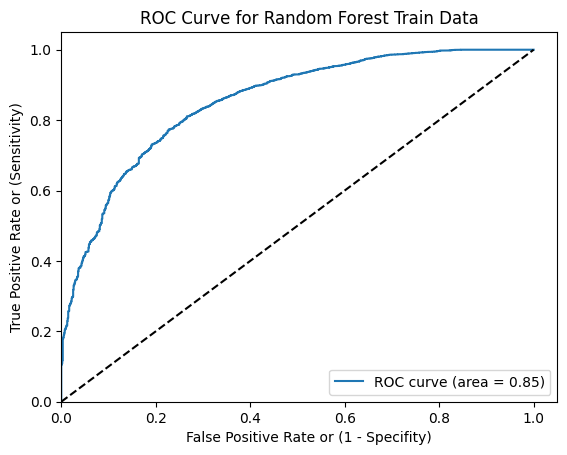

In [88]:
# Plot ROC curve for train data

plot_roc_curve(y_train, grid_search.predict_proba(X_train)[:,1], "Random Forest Train Data")

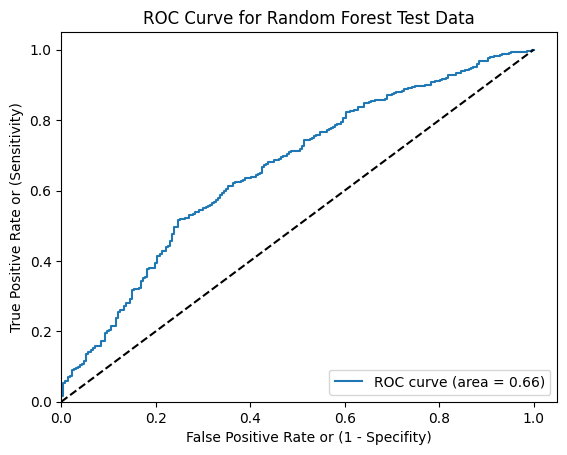

In [89]:
# Plot ROC curve for test data

plot_roc_curve(y_test, grid_search.predict_proba(X_test)[:,1], "Random Forest Test Data")